In [1]:
import networkx as nx
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite
import scipy.sparse as sparse
import freeman as fm



In [2]:
import pandas as pd 
df = pd.read_json(r"test.json")
df = df[(df.box_office != "N/A") & (df.genre != 'Adult') & (df.actors != "N/A")].dropna(subset=['box_office'])
df = df[df.genre != "N/A"].dropna(subset=['genre'])
df["box_office"] = df["box_office"].replace(',', '', regex=True).str[1:].astype({"box_office": float})
df = df.sort_values(by=['box_office'], ascending = False)

dic = {}
listagene = []

def dicionario_atorgenero(df):
    dic = {}
    listagene = []
    for i, j in zip(df["actors"], df["genre"]):
        listator = i.split(', ')
        listagen = j.split(', ')
        for a in listator:
            if a not in dic:
                dic[a] = {}
            for g in listagen:
                if g not in dic[a]:
                    dic[a][g] = 1
                else:
                    dic[a][g] += 1
                if g not in listagene:
                    listagene.append(g)
    try:
        del dic['Fantasy']
    except:
        pass
        
    return dic, listagene

#def dicionario_filmesatorep(df):
#    dic = {}
#    
#    for i in df["actors"]:
#        listator = i.split(', ')
        
        


listagene = dicionario_atorgenero(df)[1]
dic = dicionario_atorgenero(df)[0]   
dic

{'Tobey Maguire': {'Action': 1, 'Adventure': 1, 'Sci-Fi': 1},
 'Willem Dafoe': {'Action': 1,
  'Adventure': 2,
  'Sci-Fi': 1,
  'Animation': 1,
  'Comedy': 1,
  'Family': 1,
  'Drama': 1,
  'Horror': 1},
 'Kirsten Dunst': {'Action': 1,
  'Adventure': 1,
  'Sci-Fi': 1,
  'Drama': 2,
  'Romance': 3,
  'Comedy': 1},
 'James Franco': {'Action': 1,
  'Adventure': 1,
  'Sci-Fi': 1,
  'Crime': 1,
  'Drama': 1,
  'Mystery': 1,
  'Thriller': 1},
 'Albert Brooks': {'Animation': 1, 'Adventure': 1, 'Comedy': 1, 'Family': 1},
 'Ellen DeGeneres': {'Animation': 1, 'Adventure': 1, 'Comedy': 1, 'Family': 1},
 'Alexander Gould': {'Animation': 1, 'Adventure': 1, 'Comedy': 1, 'Family': 1},
 'Noel Appleby': {'Adventure': 2, 'Drama': 2, 'Fantasy': 2},
 'Ali Astin': {'Adventure': 1, 'Drama': 1, 'Fantasy': 1},
 'Sean Astin': {'Adventure': 3, 'Drama': 3, 'Fantasy': 3},
 'David Aston': {'Adventure': 1, 'Drama': 1, 'Fantasy': 1},
 'Bruce Allpress': {'Adventure': 1, 'Drama': 1, 'Fantasy': 1},
 'John Bach': {'Adve

In [3]:
df

title  year      rated  \
219                                      Spider-Man  2002      PG-13   
6275                                   Finding Nemo  2003          G   
460   The Lord of the Rings: The Return of the King  2003      PG-13   
461           The Lord of the Rings: The Two Towers  2002         PG   
3292          Harry Potter and the Sorcerer's Stone  2001         PG   
...                                             ...   ...        ...   
5825                                 Me Without You  2001          R   
7511                             Festival in Cannes  2001      PG-13   
651                               In Praise of Love  2001         PG   
1196                              Trouble Every Day  2001  Not Rated   
1840                           An Everlasting Piece  2000          R   

         released  runtime                                 genre  \
219   03 May 2002  121 min             Action, Adventure, Sci-Fi   
6275  30 May 2003  100 min  Animation, Adventure, Comedy, Family   
460   17 Dec 2003  201 min             Adventure, Drama, Fantasy   
461   18 Dec 2002  179 min             Adventure, Drama, Fantasy   
3292  16 Nov 2001  152 min            Adventure, Family, Fantasy   
...           ...      ...                                   ...   
5825  23 Nov 2001  107 min                                 Drama   
7511  25 Jul 2002  100 min                                Comedy   
651   16 May 2001   97 min                                 Drama   
1196  11 Jul 2001  101 min               Drama, Horror, Thriller   
1840  23 Mar 2001  103 min                                Comedy   

                                      director  \
219                                  Sam Raimi   
6275  Andrew Stanton, Lee Unkrich(co-director)   
460                              Peter Jackson   
461                              Peter Jackson   
3292                            Chris Columbus   
...                                        ...   
5825                         Sandra Goldbacher   
7511                              Henry Jaglom   
651                            Jean-Luc Godard   
1196                              Claire Denis   
1840                            Barry Levinson   

                                                 writer  \
219   Stan Lee (Marvel comic book), Steve Ditko (Mar...   
6275  Andrew Stanton (original story by), Andrew Sta...   
460   J.R.R. Tolkien (novel), Fran Walsh (screenplay...   
461   J.R.R. Tolkien (novel), Fran Walsh (screenplay...   
3292    J.K. Rowling (novel), Steve Kloves (screenplay)   
...                                                 ...   
5825  Sandra Goldbacher (screenplay), Laurence Coria...   
7511                        Victoria Foyt, Henry Jaglom   
651                                     Jean-Luc Godard   
1196                     Claire Denis, Jean-Pol Fargeau   
1840                                       Barry McEvoy   

                                                 actors  \
219   Tobey Maguire, Willem Dafoe, Kirsten Dunst, Ja...   
6275  Albert Brooks, Ellen DeGeneres, Alexander Goul...   
460    Noel Appleby, Ali Astin, Sean Astin, David Aston   
461   Bruce Allpress, Sean Astin, John Bach, Sala Baker   
3292  Richard Harris, Maggie Smith, Robbie Coltrane,...   
...                                                 ...   
5825  Ella Jones, Anna Popplewell, Cameron Powrie, T...   
7511  Anouk Aimée, Greta Scacchi, Maximilian Schell,...   
651   Bruno Putzulu, Cécile Camp, Jean Davy, Françoi...   
1196  Vincent Gallo, Tricia Vessey, Béatrice Dalle, ...   
1840  Barry McEvoy, Brían F. O'Byrne, Anna Friel, Pa...   

                                                   plot  ...   type  \
219   When bitten by a genetically modified spider, ...  ...  movie   
6275  After his son is captured in the Great Barrier...  ...  movie   
460   Gandalf and Aragorn lead the World of Men agai...  ...  movie   
461   While Frodo and Sam edge closer to Mordor with...  ... 

In [4]:
Actor_names = []

def graph(dic, listagene):
    
    Actor_names = []

    for k in dic:
        Actor_names.append(k)


    B = fm.Graph(nx.empty_graph())

    B.add_nodes_from(Actor_names,bipartite = 0)
    B.add_nodes_from(listagene,bipartite = 1)
    B.set_all_nodes('size', 1)
    B.set_all_nodes('labpos', 'hover')
    B.label_nodes()

    for name in Actor_names:
        max_pes = 0
        for j in dic[name]:
            max_pes += dic[name][j] 
        
        for gen in dic[name]:
            B.add_edge(name,gen,color=(0,255,0),weight=dic[name][gen]/max_pes)
        if name == 'Adam Sandler':
            print(max_pes)
    num_edges = B.number_of_edges()
    num_nodes = B.number_of_nodes()

    ## Referencia do codigo abaixo do exercicio 3 das aulas. Por algum motivo o bipartite nao funcionou
    B.move('bipartite', [n for n in B.nodes if B.nodes[n]['bipartite'] == 0])
    return B
        

In [5]:
graph(dic, listagene).draw()

9


In [6]:
#TESTA SE TEM ATOR COM NOME DE GENERO
#a = graph(dic, listagene).edges()
#for i in a:
#    if i[0] in listagene:
#        print(i)

dic['Adam Sandler']



{'Comedy': 3,
 'Fantasy': 1,
 'Animation': 1,
 'Musical': 1,
 'Drama': 1,
 'Romance': 1,
 'Thriller': 1}

In [17]:
B1 = graph(dic, listagene)
B1.label_nodes()
B1.analyze_to_move([n for n in B1.nodes if B1.nodes[n]['bipartite'] == 0])
B1.graph['awidth'] = 1
B1.skin_seaborn([n for n in B1.nodes if B1.nodes[n]['bipartite'] == 0])
B1.set_all_edges('color', (0, 0, 0, 0.0))
B1.graph['width'] = 800
B1.nodes['Comedy']['color'] = (0, 255, 0)
B1.nodes['Comedy']['size'] = 20
B1.nodes['Adam Sandler']['color'] = (0, 255, 0)
B1.nodes['Adam Sandler']['size'] = 20
B1.set_all_nodes('size', 15, filter=lambda n: B1.nodes[n]['bipartite'] == 0)
B1.draw()

9


In [8]:

top_nodes = {n for n, d in B1.nodes(data=True) if d['bipartite']==0}

nodes_atores = list(top_nodes)
G = bipartite.weighted_projected_graph(B1,nodes_atores)

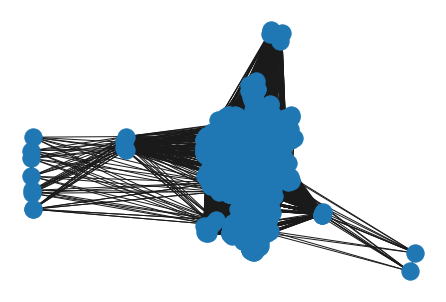

In [9]:
nx.draw(G)


In [10]:
B1 = graph(dic, listagene)
B1.label_nodes()
B1.analyze_to_move([n for n in B1.nodes if B1.nodes[n]['bipartite'] == 0])
B1.graph['awidth'] = 1
B1.skin_seaborn([n for n in B1.nodes if B1.nodes[n]['bipartite'] == 0])
B1.set_all_edges('color', (0, 0, 0, 0.0))
B1.graph['width'] = 800
B1.nodes['Comedy']['color'] = (0, 255, 0)
B1.nodes['Comedy']['size'] = 20
B1.nodes['Adam Sandler']['color'] = (0, 255, 0)
B1.nodes['Adam Sandler']['size'] = 20
B1.set_all_nodes('size', 15, filter=lambda n: B1.nodes[n]['bipartite'] == 0)
B1.draw()

9


In [11]:
B = graph(dicionario_atorgenero(df[df.year == '2000'])[0], dicionario_atorgenero(df[df.year == '2000'])[1])

B1 = B
B1.label_nodes()
B1.analyze_to_move([n for n in B1.nodes if B1.nodes[n]['bipartite'] == 0])
B1.graph['awidth'] = 1
B1.skin_seaborn([n for n in B1.nodes if B1.nodes[n]['bipartite'] == 0])
B1.set_all_edges('color', (0, 0, 0, 0.0))
B1.graph['width'] = 800
B1.nodes['Comedy']['color'] = (0, 255, 0)
B1.nodes['Comedy']['size'] = 20
B1.set_all_nodes('size', 15, filter=lambda n: B1.nodes[n]['bipartite'] == 0)
B1.draw()

2


In [12]:
B = graph(dicionario_atorgenero(df[df.year == '2001'])[0], dicionario_atorgenero(df[df.year == '2001'])[1])

B1 = B
B1.label_nodes()
B1.analyze_to_move([n for n in B1.nodes if B1.nodes[n]['bipartite'] == 0])
B1.graph['awidth'] = 1
B1.skin_seaborn([n for n in B1.nodes if B1.nodes[n]['bipartite'] == 0])
B1.set_all_edges('color', (0, 0, 0, 0.0))
B1.graph['width'] = 800
B1.nodes['Comedy']['color'] = (0, 255, 0)
B1.nodes['Comedy']['size'] = 20
B1.set_all_nodes('size', 15, filter=lambda n: B1.nodes[n]['bipartite'] == 0)
B1.draw()

In [13]:
B = graph(dicionario_atorgenero(df[df.year == '2002'])[0], dicionario_atorgenero(df[df.year == '2002'])[1])

B1 = B
B1.label_nodes()
B1.analyze_to_move([n for n in B1.nodes if B1.nodes[n]['bipartite'] == 0])
B1.graph['awidth'] = 1
B1.skin_seaborn([n for n in B1.nodes if B1.nodes[n]['bipartite'] == 0])
B1.set_all_edges('color', (0, 0, 0, 0.0))
B1.graph['width'] = 800
B1.nodes['Comedy']['color'] = (0, 255, 0)
B1.nodes['Comedy']['size'] = 20
B1.set_all_nodes('size', 15, filter=lambda n: B1.nodes[n]['bipartite'] == 0)
B1.draw()

7


In [14]:
B = graph(dicionario_atorgenero(df[df.year == '2003'])[0], dicionario_atorgenero(df[df.year == '2003'])[1])

B1 = B
B1.label_nodes()
B1.analyze_to_move([n for n in B1.nodes if B1.nodes[n]['bipartite'] == 0])
B1.graph['awidth'] = 1
B1.skin_seaborn([n for n in B1.nodes if B1.nodes[n]['bipartite'] == 0])
B1.set_all_edges('color', (0, 0, 0, 0.0))
B1.graph['width'] = 800
B1.nodes['Comedy']['color'] = (0, 255, 0)
B1.nodes['Comedy']['size'] = 20
B1.set_all_nodes('size', 15, filter=lambda n: B1.nodes[n]['bipartite'] == 0)
B1.draw()

In [15]:
B = graph(dicionario_atorgenero(df[df.year == '2004'])[0], dicionario_atorgenero(df[df.year == '2004'])[1])

B1 = B
B1.label_nodes()
B1.analyze_to_move([n for n in B1.nodes if B1.nodes[n]['bipartite'] == 0])
B1.graph['awidth'] = 1
B1.skin_seaborn([n for n in B1.nodes if B1.nodes[n]['bipartite'] == 0])
B1.set_all_edges('color', (0, 0, 0, 0.0))
B1.graph['width'] = 800
B1.nodes['Comedy']['color'] = (0, 255, 0)
B1.nodes['Comedy']['size'] = 20
B1.set_all_nodes('size', 15, filter=lambda n: B1.nodes[n]['bipartite'] == 0)
B1.draw()

In [ ]:
df

In [ ]:
print(dic)

In [ ]:
listagrafo = []
graph(dicionario_atorgenero(df[df.year == '2004'])[0], dicionario_atorgenero(df[df.year == '2004'])[1])
b = 2000

for i in range(5):
    listagrafo.append(graph(dicionario_atorgenero(df[df.year == str(b)])[0], dicionario_atorgenero(df[df.year == str(b)])[1]))
    b += 1
    


In [ ]:
listagrafo[-3].draw()

In [ ]:
l = listagrafo[-1]
fm.analyze_last_to_move_all(listagrafo, [n for n in l.nodes if l.nodes[n]['bipartite'] == 0])

In [ ]:
s = fm.Graph(fm.stack_and_track(listagrafo))

In [ ]:
s.set_all_nodes('size', 5)
s.draw()

In [ ]:
huguinho = "amo você"

In [ ]:
print(huguinho)